neighborhood
South Side Slopes      6
Beechview              6
Mount Washington       5
Hazelwood              5
Troy Hill              5
Marshall-Shadeland     4
Elliott                4
East Liberty           4
Sheraden               4
Lower Lawrenceville    3
Name: type, dtype: int64


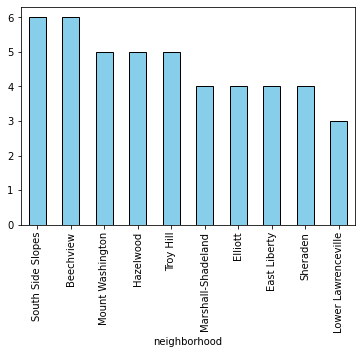

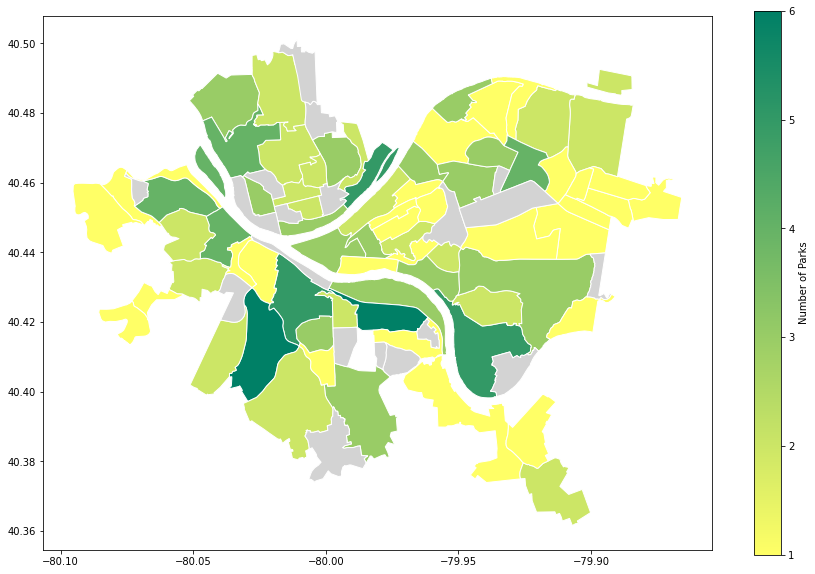

In [15]:
import pandas as pd
import geopandas
%matplotlib inline

#reads the dataset
data = pd.read_csv("Pittsburgh Parks.csv")

#Gets just the entries with the type "Park"
query_mask = data["type"]=="Park" 
gridcode = data[query_mask]
gridcode.head(10)


#Sums the amount of entries each neighborhood has in the dataset, and this will show how many parks are in each neighborhood
gridcode = gridcode.groupby("neighborhood").count()["type"].sort_values(ascending=False)


#plots a bar graph of the Top 10 neighborhoods with the most parks in Pittsburgh
top10 = gridcode.head(10)

top10.plot(kind="bar", color="skyblue", edgecolor="black")



#Makes a Choropleth map of Pittsburgh showing the how many parks each neighborhood has
parkmap = geopandas.read_file("Neighborhoods_.shp")

parkmap = parkmap.drop(columns =['objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'])
parks = parkmap.merge(gridcode, how="left", left_on="hood", right_on="neighborhood")



parks.plot(column="type", cmap="summer_r", edgecolor="white", legend=True, legend_kwds={'label': 'Number of Parks'}, figsize = (15,10), 
           missing_kwds={"color":"lightgrey"})

Conclusion: My metric measured how many parks were in each Pittsburgh neighborhood, because panthers need places to run around and explore! The neighborhoods with the most amount of parks was South Side Slopes and Beechview. Based on just the amount of parks alone this would be the most ideal place for a panther to live. My personal favorite neighborhood is Squirrel Hill, it has great food and really nice movie theater! Squirrel Hill does not have a lot of parks or green spaces so it would not be an ideal neighborhood for a panther at all. 